In [13]:
import yfinance as yf
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import math
from datetime import datetime
import seaborn as sns
from pandas.plotting import autocorrelation_plot
import plotly.express as px
%matplotlib inline

In [6]:
sns.set_style("whitegrid")
plt.style.use("seaborn-v0_8-darkgrid")

In [82]:
def download_stock_data(company_name):
    return yf.download(company_name)

In [125]:
# df = yf.Ticker('JNPR')
# hist = df.history(period='max')
# hist
# # df=yf.download('IBM')
# # df
df = download_stock_data('GOOGL')

[*********************100%***********************]  1 of 1 completed


In [126]:
# x = yf.Ticker('GOOGL')
# df = x.history(period='max')
# df

In [127]:
def plot(df, ten_day_ma, fifty_day_ma, hundred_day_ma, name='GOOGL'):
    copy = df
    copy['Diff'] = copy['Close'] - copy['Open']
    copy.loc[copy['Diff']>=0, 'color'] = 'green'
    copy.loc[copy['Diff']<0, 'color'] = 'red'
    
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    fig.add_trace(go.Candlestick(x=copy.index,
                              open=copy['Open'],
                              high=copy['High'],
                              low=copy['Low'],
                              close=copy['Close'],
                              name='Price'))
    if volume:
        fig.add_trace(go.Bar(x=copy.index, y=copy['Volume'], name='Volume', marker={'color':copy['color']}),secondary_y=True)
    if ten_day_ma:
        fig.add_trace(go.Scatter(x=copy.index,y=copy['Close'].rolling(window=10).mean(),marker_color='blue',name='10 Day MA'))
    if fifty_day_ma:
        fig.add_trace(go.Scatter(x=copy.index,y=copy['Close'].rolling(window=50).mean(),marker_color='lightblue',name='50 Day MA'))
    if hundred_day_ma:
        fig.add_trace(go.Scatter(x=copy.index,y=copy['Close'].rolling(window=100).mean(),marker_color='violet',name='100 Day MA'))
    fig.update_yaxes(range=[0,700000000],secondary_y=True)
    fig.update_yaxes(visible=True, secondary_y=True)
    fig.update_layout(xaxis_rangeslider_visible=False)  #hide range slider
    fig.update_layout(title={'text':name, 'x':0.5})
    fig.show()

In [128]:
name='GOOGL'
volume=True
ten_day_ma=False
fifty_day_ma=False
hundred_day_ma=False
plot(df, ten_day_ma, fifty_day_ma, hundred_day_ma, name='GOOGL')
# df

In [180]:
# df = px.data.stocks()
# fig = px.line(df, x='date', y="GOOG")
# fig.show()

In [179]:
# import plotly.graph_objects as go
# fig = go.Figure(data=go.Scatter(x=hist.index, y=hist['Close'], mode='lines'))
# fig.show()

In [178]:
# fig = go.Figure(data=go.Scatter(x=hist.index, y=hist['Close'], mode='lines+markers'))
# fig.show()

In [177]:
# from plotly.subplots import make_subplots

# fig2 = make_subplots(specs=[[{"secondary_y": True}]])
# fig2.add_trace(go.Scatter(x=hist.index,y=hist['Close'],name='Price'),secondary_y=False)
# fig2.add_trace(go.Bar(x=hist.index,y=hist['Volume'],name='Volume'),secondary_y=True)
# fig2.show()

In [176]:
# fig2.update_yaxes(range=[0,7000000000],secondary_y=True)
# fig2.update_yaxes(visible=False, secondary_y=True)

In [173]:
# fig3=make_subplots(specs=[[{"secondary_y":True}]])
# fig3.add_trace(go.Candlestick(x=hist.index,
#                              open=hist['Open'],
#                              high=hist['High'],
#                              low=hist['Low'],
#                              close=hist['Close']
#                              ))

In [174]:
# fig3.add_trace(go.Bar(x=hist.index, y=hist['Volume'], name='Volume'),secondary_y=True)
# fig3.update_layout(xaxis_rangeslider_visible=False)

In [175]:
# fig3.add_trace(go.Scatter(x=hist.index,y=hist['Close'].rolling(window=20).mean(),marker_color='blue',name='20 Day MA'))
# fig3.add_trace(go.Bar(x=hist.index, y=hist['Volume'], name='Volume'),secondary_y=True)
# fig3.update_layout(title={'text':'TSLA', 'x':0.5})
# fig3.update_yaxes(range=[0,1000000000],secondary_y=True)
# fig3.update_yaxes(visible=False, secondary_y=True)
# fig3.update_layout(xaxis_rangeslider_visible=False)  #hide range slider
# fig3.show()

In [181]:
# hist['diff'] = hist['Close'] - hist['Open']
# hist.loc[hist['diff']>=0, 'color'] = 'green'
# hist.loc[hist['diff']<0, 'color'] = 'red'

In [182]:
# fig3 = make_subplots(specs=[[{"secondary_y": True}]])
# fig3.add_trace(go.Candlestick(x=hist.index,
#                               open=hist['Open'],
#                               high=hist['High'],
#                               low=hist['Low'],
#                               close=hist['Close'],
#                               name='Price'))

# fig3.add_trace(go.Bar(x=hist.index, y=hist['Volume'], name='Volume', marker={'color':hist['color']}),secondary_y=True)
# fig3.add_trace(go.Scatter(x=hist.index,y=hist['Close'].rolling(window=20).mean(),marker_color='blue',name='20 Day MA'))
# fig3.update_yaxes(range=[0,700000000],secondary_y=True)
# fig3.update_yaxes(visible=False, secondary_y=True)
# fig3.update_layout(xaxis_rangeslider_visible=False)  #hide range slider
# fig3.update_layout(title={'text':'TSLA', 'x':0.5})
# fig3.show()

In [129]:
ma_day = [10, 50, 100]

for ma in ma_day:
    column_name = "MA for {} days".format(str(ma))
    df[column_name] = pd.DataFrame.rolling(df['Close'], ma).mean()

In [131]:
df['Daily Return']=df['Close'].pct_change()

In [167]:
# df2 = df[df['Daily Return']>=0]['Daily Return']

In [185]:
# max(list(df2))

0.1999154305218842

In [168]:
# df3 = df[df['Daily Return']<0]['Daily Return']

In [218]:
def plot_returns(df):
    df[df['Daily Return']>=0]['Daily Return'].plot(figsize=(12,5), linestyle=':', marker='.',color='green')
    df[df['Daily Return']<0]['Daily Return'].plot(figsize=(12,5), linestyle=':', marker='.',color='red')
    plt.legend(["Positive Return", "Negative Return"])
    plt.show()
    
    sns.histplot(df['Daily Return'].dropna(), kde=True, color='green', stat="density")
    plt.show()

In [219]:
# df[df['Daily Return']>=0]['Daily Return'].plot(figsize=(12,5), linestyle=':', marker='.',color='green')
# df[df['Daily Return']<0]['Daily Return'].plot(figsize=(12,5), linestyle=':', marker='.',color='red')
# plt.legend(["Positive Return", "Negative Return"])
# plt.show()

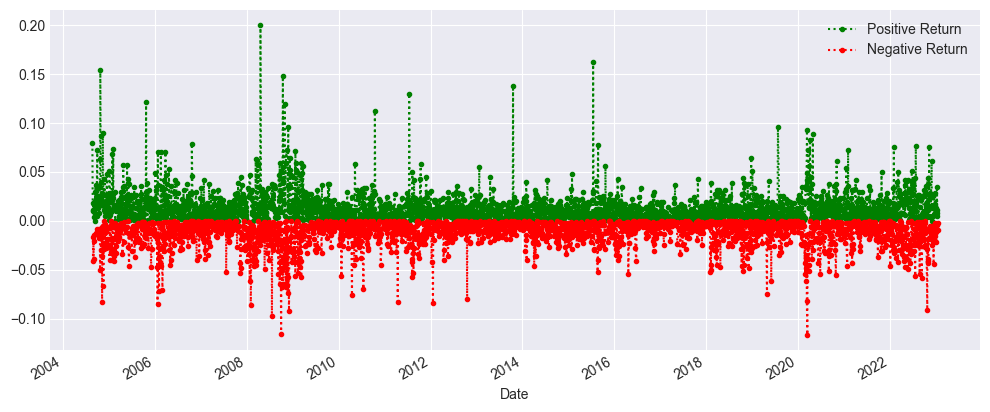

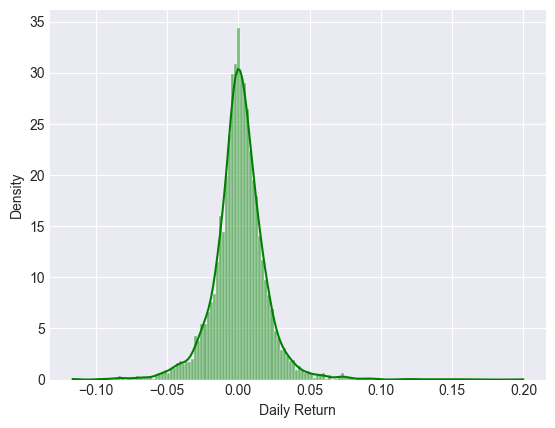

In [220]:
plot_returns(df)

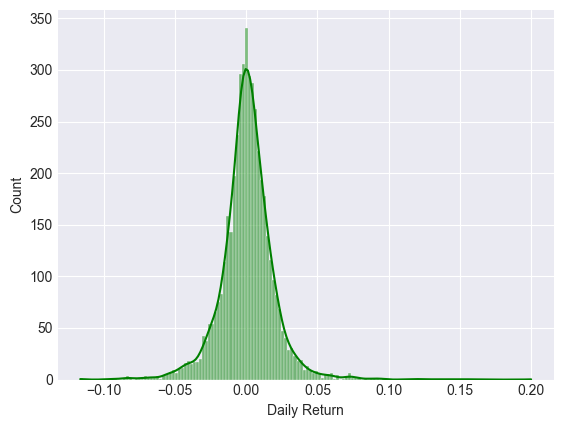

In [216]:
# sns.displot(df['Daily Return'].dropna(), bins=100, color='green')
# sns.histplot(df['Daily Return'].dropna(), kde=True, color='green', stat="density")
# plt.show()

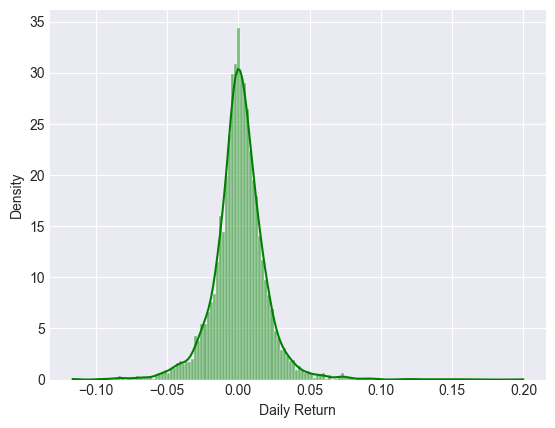

In [217]:
sns.histplot(df['Daily Return'].dropna(), kde=True, color='green', stat="density")
plt.show()

In [227]:
def create_datasets(df, window_size=100):
    x=[]
    y=[]
    
    for i in range(1, len(df)-window_size-1, 1):
        first = df.iloc[i, 2]
        temp=[]
        temp2=[]
        for j in range(window_size):
            temp.append((df.iloc[i+j, 2]-first)/first)
        temp2.append((df.iloc[i+window_size, 2]-first)/first)
        x.append(np.array(temp).reshape(100, 1))
        y.append(np.array(temp2).reshape(1,1))
    
    return x,y

In [228]:
x,y=create_datasets(df)

In [230]:
y

[array([[0.89552247]]),
 array([[0.77945877]]),
 array([[0.87438438]]),
 array([[0.91239833]]),
 array([[0.87951497]]),
 array([[0.81663342]]),
 array([[0.84413283]]),
 array([[0.76507438]]),
 array([[0.76873711]]),
 array([[0.81069323]]),
 array([[0.86468026]]),
 array([[0.87069552]]),
 array([[0.90766193]]),
 array([[0.88742561]]),
 array([[1.01046432]]),
 array([[0.93321433]]),
 array([[0.89718163]]),
 array([[0.77413796]]),
 array([[0.74231966]]),
 array([[0.6685157]]),
 array([[0.58645216]]),
 array([[0.58343938]]),
 array([[0.54952516]]),
 array([[0.64997468]]),
 array([[0.62241127]]),
 array([[0.67071306]]),
 array([[0.63597035]]),
 array([[0.50827859]]),
 array([[0.4624806]]),
 array([[0.41373137]]),
 array([[0.38409307]]),
 array([[0.40539938]]),
 array([[0.33823555]]),
 array([[0.35012838]]),
 array([[0.3451319]]),
 array([[0.38266686]]),
 array([[0.40202402]]),
 array([[0.32045959]]),
 array([[0.30023128]]),
 array([[0.2497358]]),
 array([[0.25451451]]),
 array([[0.1711574]]

Exception in thread Thread-12 (_run_via_pool):
Traceback (most recent call last):
  File "D:\virtual_env\lib\site-packages\urllib3\response.py", line 443, in _error_catcher
    yield
  File "D:\virtual_env\lib\site-packages\urllib3\response.py", line 818, in read_chunked
    chunk = self._handle_chunk(amt)
  File "D:\virtual_env\lib\site-packages\urllib3\response.py", line 762, in _handle_chunk
    value = self._fp._safe_read(amt)
  File "C:\Python310\lib\http\client.py", line 631, in _safe_read
    raise IncompleteRead(data, amt-len(data))
http.client.IncompleteRead: IncompleteRead(6592 bytes read, 3648 more expected)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\virtual_env\lib\site-packages\requests\models.py", line 816, in generate
    yield from self.raw.stream(chunk_size, decode_content=True)
  File "D:\virtual_env\lib\site-packages\urllib3\response.py", line 623, in stream
    for line in self.read_chunked(amt

In [229]:
x

[array([[ 0.        ],
        [ 0.08507473],
        [ 0.03054735],
        [ 0.03363208],
        [ 0.04139301],
        [ 0.05164192],
        [ 0.01502502],
        [ 0.01651762],
        [-0.00825871],
        [-0.01552233],
        [-0.01174141],
        [-0.00885556],
        [ 0.        ],
        [ 0.00497538],
        [ 0.00796019],
        [ 0.0593035 ],
        [ 0.06258692],
        [ 0.09651753],
        [ 0.11094532],
        [ 0.129851  ],
        [ 0.16189057],
        [ 0.16925391],
        [ 0.16228853],
        [ 0.16437797],
        [ 0.1916419 ],
        [ 0.17213938],
        [ 0.1961194 ],
        [ 0.25602003],
        [ 0.2835821 ],
        [ 0.2825872 ],
        [ 0.33363188],
        [ 0.31582084],
        [ 0.35323376],
        [ 0.35870645],
        [ 0.36338322],
        [ 0.33184105],
        [ 0.32736308],
        [ 0.39383113],
        [ 0.37870638],
        [ 0.41243772],
        [ 0.40507475],
        [ 0.46616908],
        [ 0.38905463],
        [ 0

mention and explain better methods than using a CNN for feature extraction for stock price prediction

One method for feature extraction for stock price prediction that is often used in addition to or as an alternative to convolutional neural networks (CNNs) is the use of recurrent neural networks (RNNs). RNNs are particularly well-suited for this task because they are designed to process sequential data, such as time series data. RNNs can also be used to incorporate historical data and trends into the prediction process, which can help improve the accuracy of the predictions.

Another method that can be used for feature extraction is the use of traditional machine learning techniques such as support vector machines (SVMs) or random forests. These methods can be used to extract a set of relevant features from the data, which can then be used as input for a prediction model.

Additionally, more recent methods such as Transformer-based models can be used to extract features and make predictions. These models are trained on massive amounts of data and can take into account a wide range of factors, including historical trends, economic indicators, and news articles, to make predictions.

In summary, alternative to CNNs, RNNs, traditional machine learning techniques and transformer-based models can be utilized for feature extraction and making predictions on stock prices.
explain CNN LSTM architecture for stock price prediction, and mention a better alternative to using CNNs

A CNN-LSTM architecture for stock price prediction combines the strengths of both CNNs and LSTMs to extract features from the data and make predictions. In this architecture, the CNN component is used to extract features from the historical stock data, such as price, volume, and technical indicators. These features are then passed on to the LSTM component, which uses the sequential nature of the data to make predictions about future stock prices.

The CNN component of the architecture is used to extract features from the historical stock data, such as price, volume, and technical indicators. It uses convolutional layers to identify patterns in the data and extract the most relevant features. The LSTM component then uses these features as input, and its ability to remember previous inputs to make predictions about future stock prices.

An alternative to using CNNs in this architecture is to use a transformer-based model. Transformer-based models like BERT, GPT-2, and GPT-3 are known for their ability to process large amounts of data and extract relevant features. These models can take into account a wide range of factors, including historical trends, economic indicators, and news articles, to make predictions. They are also known for their ability to generalize well to new data and perform well in various NLP tasks. This makes it a good alternative for stock price prediction, where the underlying data can be not only numerical but also textual such as news articles.
suggest more alternatives

Other alternatives for stock price prediction include:

    Autoregressive Integrated Moving Average (ARIMA): This is a traditional time series analysis method that models the relationship between a given time series and its lagged values. It can be used to make predictions based on historical stock data.

    Gated Recurrent Unit (GRU): Similar to LSTM, GRU is a type of RNN that can process sequential data and make predictions. However, it has a simpler structure, making it easier to train and less computationally expensive.

    Random Forest: Random Forest is a traditional machine learning algorithm that can be used to extract features from the data and make predictions. It is based on the concept of decision trees, and can be used to identify patterns in the data and make predictions based on those patterns.

    Gradient Boosting: This is an ensemble machine learning technique that combines multiple weak models to create a stronger one. It can be used to extract features from the data and make predictions.

    Deep Belief Networks (DBN): DBN is an unsupervised deep learning model that can be used to extract features from the data and make predictions. It is based on the concept of stacked restricted Boltzmann machines, and is particularly well-suited for tasks involving unstructured data.

All these alternatives have their own strengths and weaknesses, and the appropriate method for a given task depends on the nature of the data and the requirements of the prediction task.
can extreme learning machines be used as an alternative

Yes, Extreme Learning Machines (ELM) can be used as an alternative method for stock price prediction. ELM is a type of single-hidden layer feedforward neural network that is trained using a random initialization of the weights and a deterministic algorithm for the output weights. This makes it much faster to train than traditional neural network methods, and it has been shown to be able to achieve good performance on a wide range of tasks.

One of the main advantages of ELM is that it can be used to extract features from the data and make predictions in a very efficient way. Additionally, it is less prone to overfitting than traditional neural networks and it has been used in various applications such as image classification, speech recognition, and time series prediction.

In stock price prediction, ELM can be used to extract features from historical stock data and make predictions about future stock prices. The network can be trained on historical stock data, and the extracted features can be used as input to make predictions. However, it's worth noting that ELM is not as widely used as other neural networks, and it's performance in stock prediction is not as well studied as other methods.
explain other alternatives than ELMs

Other alternatives for stock price prediction include:

    Time-series analysis methods: These methods are used to analyze and predict future values in a time series data. Examples include Autoregressive Integrated Moving Average (ARIMA), Exponential smoothing, and Seasonal decomposition of time series (STL).

    Recurrent Neural Networks (RNNs) and variants: RNNs and its variants like LSTM and GRU are well suited for sequential data and can take into account historical data and trends to make predictions.

    Traditional Machine Learning methods: These include support vector machines (SVMs), Random Forests, and Gradient Boosting. These methods can extract relevant features from the data and make predictions.

    Transformer-based models: These models like BERT, GPT-2, and GPT-3 are trained on massive amounts of data and can take into account a wide range of factors, including historical trends, economic indicators, and news articles, to make predictions.

    Deep Belief Networks (DBN): DBN is an unsupervised deep learning model that can be used to extract features from the data and make predictions.

    Hybrid models: Combining different models or architectures can lead to better results. For example, combining a CNN and LSTM, or using ensemble methods that combine multiple models predictions.

Each of these alternatives has its own strengths and weaknesses, and the appropriate method for a given task depends on the nature of the data and the requirements of the prediction task. It's important to evaluate the performance of different models on the specific dataset and try different combinations of models to find the best solution.

https://www.kaggle.com/code/aadhityaa/stock-market-prediction-using-cnn-lstm/notebook